# UIUC GHG Emissions

This notebook shows the emissions from UIUC by year and by goal. 

The data is not available in a downloadable format but can be accessed [here](https://icap.sustainability.illinois.edu/metric/total-campus-ghg-emissions). 

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.rcParams['figure.figsize'] = (12,9)
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['pgf.rcfonts'] = False
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


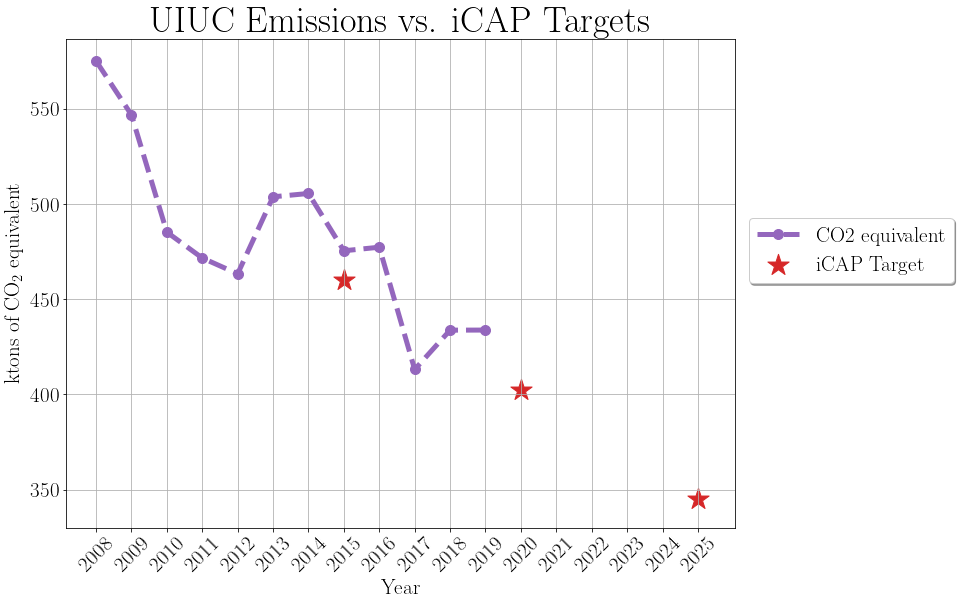

In [3]:
# years of available data
years = np.arange(2008, 2020, 1).astype(int)
goalyr = np.arange(2008, 2026, 1).astype(int)
# in ktons of CO2eq
emissions = np.array([575.088, 546.778, 485.208, 471.628, 463.343, 503.747, 505.503, 
                      475.418, 477.287, 413.106, 433.751, 433.797])
goals = {2015:459.875, 2020:402.562, 2025:344.906}

plt.plot(years, emissions, label="CO2 equivalent", marker='o', lw=5, linestyle='--', 
         color='tab:purple', markersize=10)
plt.scatter(goals.keys(), goals.values(), label='iCAP Target', marker='*', s=500, color='tab:red')
plt.title("UIUC Emissions vs. iCAP Targets", fontsize=36)
plt.ylabel("ktons of CO$_2$ equivalent", fontsize=21)
plt.yticks(fontsize=21)
plt.xlabel("Year", fontsize=21)
plt.xticks(goalyr, fontsize=21, rotation=45)
plt.grid(which='major')
plt.legend(loc=(1.02,0.5),fancybox=True, shadow=True, fontsize=21,prop={'size': 21})
# plt.show()
plt.savefig("../publications/papers/optimal-sizing-paper/images/icap_goals.pgf")
plt.savefig("../publications/papers/optimal-sizing-paper/images/icap_goals.eps", bbox_inches='tight')

We have to interpolate the goals for years not listed by iCAP

In [21]:
data = np.empty(36)
data[:] = np.NaN
data[0] = 459.875
data[5] = 402.562
data[10] = 344.906
data[-1] = 0.0
print(data)

[459.875     nan     nan     nan     nan 402.562     nan     nan     nan
     nan 344.906     nan     nan     nan     nan     nan     nan     nan
     nan     nan     nan     nan     nan     nan     nan     nan     nan
     nan     nan     nan     nan     nan     nan     nan     nan   0.   ]


In [22]:
icap_df = pd.DataFrame({'year':np.arange(2015,2051,1), 'goal':data})

In [34]:
icap_df['goal'] = icap_df['goal'].interpolate(method='linear')

,year,goal
6,2021,391.03080
7,2022,379.49960
8,2023,367.96840
9,2024,356.43720
10,2025,344.90600
11,2026,331.10976
12,2027,317.31352
13,2028,303.51728
14,2029,289.72104
15,2030,275.92480


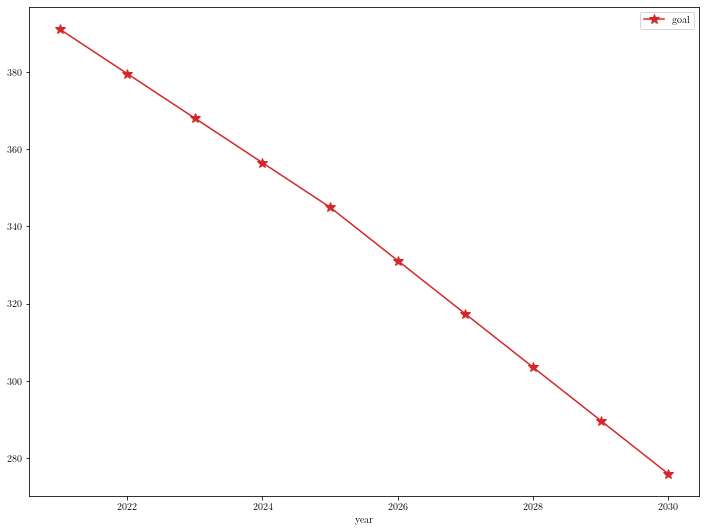

In [37]:
mask = (icap_df['year'] <= 2030) & (icap_df['year'] >= 2021)
icap_df[mask].plot(x='year', y='goal', marker='*', color='tab:red', markersize=10)
icap_df[mask]